### Lets implement a basic tree data structure

In [62]:
from typing import Dict, Tuple, Sequence, List 

##### data structures

In [224]:

#only one parent 
class TreeNode: 
    
    counter = 0; #for debugging purposes, not really needed
    
    def __init__( self, parent_node ):
        self.parent = parent_node
        self._id = TreeNode.counter 
        self.children = [] 
        TreeNode.counter = TreeNode.counter + 1
        
    def __str__(self):
        id_parent = " none " if self.parent == None else str(self.parent.id); 
        return "node id: " + str( self.id ) + ". Parent id: " + id_parent;  
        
    @property
    def id(self):
        return self._id

    @id.setter
    def id(self, value):
        self._id = value
        
    def add_child( self, child ):
        child.parent = self
        self.children.append( child )
    
#same but it stores also some arbitrary data 
class TreeDataNode( TreeNode ): 
        
       
    def __init__( self,parent_node, data: None ):

        super().__init__( parent_node )
        self.data   = data;
        
    def add_child( child ):
        child.parent = self
        self.children.append( child )
        return child
    
    def __str__(self):
        return super().__str__() + " data: " + str(self.data)

        
class DataTree:
      
    def __init__(self, data = None):
        self._head = TreeDataNode( None, data ) 
   
    @property 
    def head(self):
        return _head
     

    


In [304]:

#only one connection between nodes (not the bridges problem yet) 
class GraphNode: 
    
    counter = 0; #for debugging purposes, not really needed
    
    def __init__( self, connections = None, data = None  ):
        self.connections = set ( connections ) if connections else set()
        self._id = GraphNode.counter 
        self.data = data; 
        GraphNode.counter = GraphNode.counter + 1
        
    def __str__(self):
        s1 =  "Graph node id: " + str( self.id ) + " data: " + str(self.data)# + ".\nLinks: " + str(self.connections);  
        s2 =  ""#"Connections: " + str( [ {n.id,n.data} for n in self.connections] )
        return s1 + "\n" + s2 
    
    def __repr__(self):
        s1 =  "Graph node id: " + str( self.id ) + " data: " + str(self.data)# + ".\nLinks: " + str(self.connections);  
        s2 =  ""#"Connections: " + str( [ {n.id,n.data} for n in self.connections] )
        return s1 + "\n" + s2 
    
    def add_connection( self, node ):
        self.connections.add ( node )
        
    @property
    def id(self):
        return self._id

    @id.setter
    def id(self, value):
        self._id = value
        
    #def add_connection( self, graph_node ):
    #    child.parent = self
    #    self.children.append( child )

class Graph: 
  
    def __init__( self ):
        self.nodes = []; #set(); 
        
    def __len__( self ): 
        return len( self.nodes )
    
    def add_node( self, node ):
        #self.nodes.add( node )
        if node not in self.nodes: self.nodes.append( node )
        
    
    def add_nodes( self, nodes ):
        for node in nodes:
            self.add_node( node )
        
    def add_connection( self, node1, node2 ):
        node1.add_connection( node2 )
        node2.add_connection( node1 )
        
    def create_periodic_rect_grid( self, hcols, vrows ):
        cells = hcols * vrows;

        items = []
        for cy in range( vrows ):
            for cx in range (hcols ):
                cell = cx  + hcols * cy 
                #print(f"cell {cell} = ({cx},{cy})")

                grid_node = GraphNode( connections = None, data = f"cell:{cell}, indices:({cx},{cy})")
                items.append( grid_node )
                #print(grid_node.data)

        #ADD THE NODES
        self.add_nodes( items )     
        #print(f"Created a graph with {len( g1 )} nodes ");

        #now lets do the connections with periodic boundary conditions 
        offsetx = [1, 0,-1,  0]
        offsety = [0, 1, 0, -1]
        offset_cells = len( offsetx )
        for cy in range( vrows ):
            for cx in range ( hcols ):

                cell1 = cx  + cy  * hcols
                #print("doing cell1 ", cx, cy )
                for offset in range( offset_cells):
                    cx2 = cx + offsetx[ offset ]
                    cy2 = cy + offsety[ offset ]


                    #print("checking neighbour ", cx2, cy2 ) 
                    #periodic boundaries 
                    if cx2 >= hcols: cx2 = 0;
                    if cx2 < 0 : cx2 = hcols -1;

                    if cy2 >= vrows: cy2 = 0;
                    if cy2 < 0: cy2 = vrows -1;

                    #print("which becomes ", cx2, cy2 ) 

                    cell2 = cx2 + cy2 * hcols

                    #NOW WE ADD THE CONNECTIONS
                    node1 = items[ cell1 ]
                    node2 = items[ cell2 ]
                    self.add_connection( node1, node2 )
                #print("--------------------")

        #debugging 
        #print("node 0 ", items[0], "links\n",items[0].connections)         
        #print("node 2 ", items[2], "links\n",items[2].connections)         

        return items 

    def depth_first_search_path( self, node1, node2, max_depth = 99999999 ):
        
        if node1 == node2:
            return [node1, node2 ]
        
        if len(node1.connections)<1:
            return []
        
        if len(node2.connections)<1:
            return []
    
        frontier =  [node1]
        explored = set();
        path = []        
        end_node = None  
        retrace = {}
        depth = { node1: 0 }
        max_expanded_depth = 0 
        keep_searching = True  
        while keep_searching: 
         
            n1 = frontier[ len(frontier)-1 ] #pull the last one added to the list 
            frontier.remove( n1 )
            explored.add( n1 )
            
            connections = n1.connections
            for node in connections:
                
                if node not in frontier and node not in explored:  
                
                    #new node at the end of the list. It will be the next one pulled out  
                    frontier.append( node )              

                    #this is jsut to keep track of the depth searched. 
                    depth[ node ] = depth[ n1 ] + 1 
                    max_expanded_depth = max( max_expanded_depth, depth[ node ])
                    retrace[node] = n1

                    #if target is found, stop 
                    if node == node2:
                        end_node = node
                        break;
                                       
            continue_condition = len(frontier) > 0  and not end_node and max_expanded_depth <= max_depth
            keep_searching = True if continue_condition else False;       
        

        if end_node: #there is a path, lets build it 
            path.append( end_node )
            parent = retrace.get(end_node)         
            while parent is not node1: 
                path.append( parent )
                parent = retrace.get(parent)
                
            path.append( node1 )           
            path.reverse();
            
        return path;
        
    def first_search_path( self, node1, node2, max_depth = 99999999, sort_function = None  ):
        
        def do_not_sort_connections( node1, node2, links ):
            return links 
        
        if sort_function == None:
            sort_connections = do_not_sort_connections
        else:
            sort_connections = sort_function
        
        io = 0 
        
        if node1 == node2:
            return [node1, node2 ]
        
        if len(node1.connections)<1:
            return []
        
        if len(node2.connections)<1:
            return []
        
        frontier =  [node1]
        explored = set();
        path = []        
        end_node = None  
        retrace = {}
        depth = { node1: 0 }
 
        keep_searching = True  
        while keep_searching: 
         
            n1 = frontier[ io ]
            frontier.remove( n1 )
            explored.add( n1 )
            
            connections = sort_connections( node1, node2, n1.connections )
            
            for node in connections:
                if node not in frontier and node not in explored:  
                    frontier.append( node )                   
                    depth[ node ] = depth[ n1 ] + 1 
                    retrace[node] = n1
                    
                    if node == node2:
                        end_node = node
                        keep_searching = False;
                        break; 
                        
            #print("Updated frontier nodes ", [x.data for x in frontier])
            #print("retrace ",[x.data for x in retrace])
            continue_condition = len(frontier) > 0  and not end_node and max([ v for k,v in depth.items() ]) < max_depth
            keep_searching = True if continue_condition else False;
                        
        if end_node: #there is a path, lets build it 
            path.append( end_node )
            #print("Appended ", end_node.data)
            
            parent = retrace.get(end_node)         
            while parent is not node1: 
                end_node= parent 
                path.append( end_node )
                parent = retrace.get(end_node)
                
            path.append( node1 )           
            path.reverse();
            
        return path;
    
    

class RectGrid( Graph ): 

    def __init__( self, hcols, vrows ):
        super().__init__( );
        self.nodes = [] ; 
        self.rows = vrows
        self.cols = hcols 
        self.create_periodic_rect_grid( hcols, vrows )
        
    @property
    def node_list(self):
        return self.nodes
    
    def get_node_from_indices( self, hcol, vrow ):
        cell =  hcol + vrow * self.cols
        return self.nodes[ cell ]
    
    def get_node( self, index ):
        vrow  =  int( 1.0*index/self.cols ) 
        hcol  =  index - vrow * self.cols
        return self.get_node_from_indices( hcol, vrow )
    
  

### Version 2, no memory allocated for connections

In [47]:
#only one parent 
class RectGridNode: 
    
    counter = 0; #for debugging purposes, not really needed
    
    def __init__(self, loc, parent, direction, depth):
        self._loc = loc
        self._parent = parent 
        self._direction = direction
        self._depth = depth 
        self._id = RectGridNode.counter 

    #for comparison        
    def __eq__(self, other ):
        return True if self.loc  == other.loc else False 
                
    def __neq__(self, other ):
        return True if self.loc  != other.loc else False 
                
    #for debugging 
    def __str__(self):
        return str(self.loc)

    def __repr__(self):
        return str(self.loc)
    
    def __str__(self):
        loc_parent = " none " if self.parent == None else str(self.parent.loc); 
        return  "Loc:"+str( self.loc ) + ",Parent:" + str(loc_parent) + ",Depth:" + str(self.depth);  
                
    @property
    def id(self):
        return self._id

    @id.setter
    def id(self, value):
        self._id = value

    @property
    def parent(self):
        return self._parent
    
    @property
    def direction(self):
        return self._direction
    
    @property
    def depth(self):
        return self._depth
    
    @property
    def loc(self):
        return self._loc
    
    
    
#same but it stores also some arbitrary data 
class RectGridDataNode( RectGridNode ): 
        
       
    def __init__(self, loc, parent, direction, depth, data = None ):

        super().__init__( loc, parent, direction, depth )
        self._data   = data;
        
    @property
    def data(self):
        return self._data

    @data.setter
    def data(self, value):
        self._data = value 
        
    def __str__(self):
        return super().__str__() + ", Data: " + str(self.data)

    
class RectGrid: 

    def __init__( self, cols, rows, layers = 1,  offset = None, periodic = True ):
        self._rows   = rows
        self._cols   = cols 
        seld._layers = layers 
        self._periodic = periodic 
        self._offset   = None  
        
        
    def __len__(self): 
        return self.size();
        
   
    def __str__(self):
        return "Rect Grid" + str(self.cols) + " x " + str(self.rows)

    def __repr__(self):
        return seld.__str__();
    
    @property
    def size(self):
        return (self.cols,self.rows)    
    
    @property
    def cols(self):
        return self._cols

    @cols.setter
    def cols(self, value):
        self._cols = value
        
    @property
    def rows(self):
        return self._rows

    @rows.setter
    def rows(self, value):
        self._rows = value      
        
        
class DataRectGrid(RectGrid): 

    def __init__( self, cols, rows, periodic = True ):
        super().__init__( cols, rows, periodic )
        self._nodes = [] 
        
    def __len__(self): return self.size();
        
   
    def __str__(self):
        return "DataRect Grid" + str(self.cols) + " x " + str(self.rows)

    def __repr__(self):
        return self.__str__();
   
    
    @property
    def size(self):
        return (self.cols,self.rows)  
    
    
    @property
    def rows(self):
        return self._rows
    @property
    def cols(self):
        return self._rows
    
    @rows.setter
    def rows(self, value):
        raise BaseException("Cannot resize rows in a DataRectGrid. Use resize(cols,rows) to re-allocate the grid data")
        
    @cols.setter
    def cols(self, value):
        raise BaseException("Cannot resize cols in a DataRectGrid. Use resize(cols,rows) to re-allocate the grid data")    

In [112]:
class RectGrid: 

    def __init__( self, cols, rows, layers = 1,  offset = None, periodic = True ):
        self._rows   = rows
        self._cols   = cols 
        self._layers = layers 
        self._periodic = periodic 
        self._offset   = None  
        
        
    def __len__(self): 
        return self.size();
        
   
    def __str__(self):
        return "Rect Grid" + str(self.cols) + " x " + str(self.rows)

    def __repr__(self):
        return self.__str__();
    
    @property
    def size(self):
        return (self.cols,self.rows)    
    
    @property
    def cols(self):
        return self._cols

    @cols.setter
    def cols(self, value):
        self._cols = value
        
    @property
    def rows(self):
        return self._rows

    @rows.setter
    def rows(self, value):
        self._rows = value    
        
    @property
    def layers(self):
        return self._layers

    @rows.setter
    def layers(self, value: int):
        self._layers = value  
        
        
    @property
    def offset(self):
        return self._offset

    @rows.setter
    def offset(self, value:tuple):
        self._offset = value 
        
        
class MindCraftCell:
    
    def talk(self):
        print("I am a generic cell with no data attributes ")
        
        
class MindCraftGrid( RectGrid ):
    
        
    def __init__( self, cols, layers,  rows, offset ):
        super().__init__(cols, rows, layers,  offset, periodic = False )
        self._material = [] 
        
        
    def __str__(self):
        s = "Mindcraft Grid. Dims: " + str(self.cols) + " x " + str(self.layers) + " x " + str(self.rows)   + "\n"
        s += "Origin: " + str(self.offset)
        return s
    
    @staticmethod 
    def create_from_world():
        return MindCraftGrid(10,10,10,(4,3,4)) 
    
        
    def resize( self, cols_rows: tuple ):
        self._cols = cols_rows[0]
        self._layers= cols_rows[1]
        self._rows = cols_rows[2]
            
    
    @property
    def size(self):
        return (self.cols,self.rows)    
    
    @property
    def cols(self):
        return self._cols
    @cols.setter
    def cols(self, value):
        raise BaseException("Cannot resize rows in a DataRectGrid. Use resize(cols,rows) to re-allocate the grid data")        
    
    @property
    def rows(self):
        return self._rows

    @rows.setter
    def rows(self, value):
        raise BaseException("Cannot resize rows in a DataRectGrid. Use resize(cols,rows) to re-allocate the grid data")
            
    @property
    def layers(self):
        return self._layers

    @rows.setter
    def layers(self, value: int):
        raise BaseException("Cannot resize rows in a DataRectGrid. Use resize(cols,rows) to re-allocate the grid data")
   
    
    def set_material( self,cell: tuple, code: int, data = None):
        pass
    
    def get_material( self,cell: tuple, code: int, data = None):
        pass
        
    def find_water_top(self,cell: tuple):
        pass
    
    def find_air_bottom(self,cell: tuple):
        pass
    
    def is_generic_rock(self,cell: tuple):
        pass
    
    def is_generic_bush(self,cell: tuple):
        pass
    
    def is_any_of( self, cell: tuple,materials):
        pass
    
    
class WorldBuilder:
    
    def __init__():
        pass

#bounds, cost per tile, etc...
class PathFinder():
    pass 


#bounds, cost per tile, etc...
class Roadbuilder:
    
    def __init( WorldBuilder ):
        super().__init__()
            
    def build( start, end, grid ):
        pass
    
    
    
    
    
    
    
    
    
    

In [106]:
grid = MindCraftGrid(cols = 12,layers = 12, rows= 12, offset = (-300,-500,-199))
grid 

Mindcraft Grid. Dims: 12 x 12 x 12
Origin: 12

In [107]:
grid.resize( (2,3,4) )
grid.size, grid.cols, grid.rows


((2, 4), 2, 4)

In [108]:
grid = MindCraftGrid.create_from_world();

In [109]:
grid

Mindcraft Grid. Dims: 10 x 10 x 10
Origin: 10

In [110]:
node1 = RectGridDataNode(loc = (0,0), parent = None, direction = None, depth  = 0, data = None )
print(node1)

Loc:(0, 0),Parent: none ,Depth:0, Data: None


In [111]:
grid = RectGrid(3,3,False)
grid.cols = 5

##### debugging testing 

In [305]:
g1 = Graph()
nodes = { letter:GraphNode(None,letter) for letter in ["a","b","c","d","e","f","g","h"] }
g1.add_nodes( [ v for k,v in nodes.items()] )     
len( g1 )

g1.add_connection(nodes['a'], nodes['b'])
g1.add_connection(nodes['a'], nodes['c'])

g1.add_connection(nodes['d'], nodes['b'])
g1.add_connection(nodes['d'], nodes['c'])
g1.add_connection(nodes['d'], nodes['e'])

g1.add_connection(nodes['f'], nodes['c'])
g1.add_connection(nodes['f'], nodes['g'])

g1.add_connection(nodes['g'], nodes['d'])
g1.add_connection(nodes['g'], nodes['h'])

g1.add_connection(nodes['h'], nodes['e'])


print("Checking....")
for n in g1.nodes: print( n,"\n" )


l = g1.first_search_path( nodes['a'], nodes['d'])


print("resulting path: ")
print( [item.data for item in l ] )

hcols = 4 
vrows = 3 
grid = RectGrid(  hcols, vrows );

nodes = grid.nodes 
for node_index in range(8):
    retrieved_node = grid.get_node( node_index )
    print('node index', retrieved_node )
    print('true node ', nodes[ node_index] )

Checking....
Graph node id: 0 data: a
 

Graph node id: 1 data: b
 

Graph node id: 2 data: c
 

Graph node id: 3 data: d
 

Graph node id: 4 data: e
 

Graph node id: 5 data: f
 

Graph node id: 6 data: g
 

Graph node id: 7 data: h
 

resulting path: 
['a', 'c', 'd']
node index Graph node id: 8 data: cell:0, indices:(0,0)

true node  Graph node id: 8 data: cell:0, indices:(0,0)

node index Graph node id: 9 data: cell:1, indices:(1,0)

true node  Graph node id: 9 data: cell:1, indices:(1,0)

node index Graph node id: 10 data: cell:2, indices:(2,0)

true node  Graph node id: 10 data: cell:2, indices:(2,0)

node index Graph node id: 11 data: cell:3, indices:(3,0)

true node  Graph node id: 11 data: cell:3, indices:(3,0)

node index Graph node id: 12 data: cell:4, indices:(0,1)

true node  Graph node id: 12 data: cell:4, indices:(0,1)

node index Graph node id: 13 data: cell:5, indices:(1,1)

true node  Graph node id: 13 data: cell:5, indices:(1,1)

node index Graph node id: 14 data: cel

In [306]:
xx = [(0, [3]), (1, [3]), (2, [3]), (3, [8])]
xx


[(0, [3]), (1, [3]), (2, [3]), (3, [8])]

In [307]:
for food_index, ant_index in xx: 
    print( food_index, ant_index ) 


0 [3]
1 [3]
2 [3]
3 [8]


In [308]:
food_ant_dict = { 0:[3],1:[],2:[]}
food_ant_dict = { k:v for k,v in food_ant_dict.items() if len(v)>0} 
food_ant_dict

{0: [3]}

### Basic search case

### Example from the course,videos in unit 2.3.1
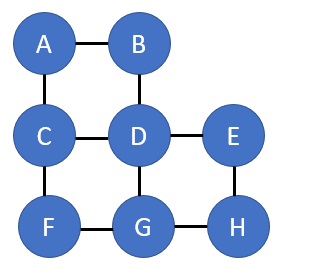


##### Lets construct a graph of the above grid states and transitions

In [309]:
g1 = Graph()

nodes = { letter:GraphNode(None,letter) for letter in ["a","b","c","d","e","f","g","h"] }
g1.add_nodes( [ v for k,v in nodes.items()] )     
len( g1 )

g1.add_connection(nodes['a'], nodes['b'])
g1.add_connection(nodes['a'], nodes['c'])

g1.add_connection(nodes['d'], nodes['b'])
g1.add_connection(nodes['d'], nodes['c'])
g1.add_connection(nodes['d'], nodes['e'])

g1.add_connection(nodes['f'], nodes['c'])
g1.add_connection(nodes['f'], nodes['g'])

g1.add_connection(nodes['g'], nodes['d'])
g1.add_connection(nodes['g'], nodes['h'])

g1.add_connection(nodes['h'], nodes['e'])

#print("Checking....")
#for n in g1.nodes: print( n,"\n" )

## Uniformed search width max-depth option 
Uninformed Search is a term describing the class 
of search algorithm that only use the information 
provided in the problem description, namely the start 
and goal states, the available actions, transitions 
function, states, and the path cost. 

<b> They do not use 
any heuristics to take the best guess on what nodes 
might be good to explore next.</b>

### Depth-first search


In [311]:
path = g1.depth_first_search_path( nodes['a'], nodes['d'])
trace = "->".join([ item.data for item in path])
print(f"Path from {nodes['a'].data} to {nodes['d'].data} is: {trace}" )

path = g1.depth_first_search_path( nodes['e'], nodes['f'])
trace = "->".join([ item.data for item in path])
print(f"Path from {nodes['e'].data} to {nodes['f'].data} is: {trace}" )

path = g1.depth_first_search_path( nodes['h'], nodes['a'])
trace = "->".join([ item.data for item in path])
print(f"Path from {nodes['h'].data} to {nodes['a'].data} is: {trace}" )

path = g1.depth_first_search_path( nodes['h'], nodes['b'])
trace = "->".join([ item.data for item in path])
print(f"Path from {nodes['h'].data} to {nodes['b'].data} is: {trace}" )


Path from a to d is: a->c->d
Path from e to f is: e->h->g->f
Path from h to a is: h->g->d->c->a
Path from h to b is: h->g->d->b


In [312]:
path = g1.first_search_path( nodes['a'], nodes['d'])
trace = "->".join([ item.data for item in path])
print(f"Path from {nodes['a'].data} to {nodes['d'].data} is: {trace}" )

path = g1.first_search_path( nodes['e'], nodes['f'])
trace = "->".join([ item.data for item in path])
print(f"Path from {nodes['e'].data} to {nodes['f'].data} is: {trace}" )

path = g1.first_search_path( nodes['h'], nodes['a'])
trace = "->".join([ item.data for item in path])
print(f"Path from {nodes['h'].data} to {nodes['a'].data} is: {trace}" )

path = g1.first_search_path( nodes['h'], nodes['b'])
trace = "->".join([ item.data for item in path])
print(f"Path from {nodes['h'].data} to {nodes['b'].data} is: {trace}" )


Path from a to d is: a->b->d
Path from e to f is: e->d->g->f
Path from h to a is: h->e->d->b->a
Path from h to b is: h->e->d->b


### Rectangular (single-link) graph for the ants problem and search algorithms 

In [248]:

#by default it uses periodic boundary conditions 
hcols = 4 
vrows = 3 
grid  = RectGrid(  hcols, vrows );
nodes = grid.node_list; 

max_depth_search = 4

path = grid.first_search_path( nodes[0], nodes[11], max_depth_search)
trace = "->".join([ item.data for item in path])
print(f"Path from {nodes[0].data} to {nodes[11].data} is: {trace}" )

path = grid.first_search_path( nodes[0], nodes[6], max_depth_search)
trace = "->".join([ item.data for item in path])
print(f"Path from {nodes[0].data} to {nodes[11].data} is: {trace}" )


Path from cell:0, indices:(0,0) to cell:11, indices:(3,2) is: cell:0, indices:(0,0)->cell:8, indices:(0,2)->cell:11, indices:(3,2)
Path from cell:0, indices:(0,0) to cell:11, indices:(3,2) is: cell:0, indices:(0,0)->cell:4, indices:(0,1)->cell:5, indices:(1,1)->cell:6, indices:(2,1)


In [255]:
food = [ (1,2), (4,5) ]
food[0][1]
    

2

In [268]:
d = { 0: [3], 1: [3], 2: [3], 3: [8]}
d

{0: [3], 1: [3], 2: [3], 3: [8]}

In [269]:
#sort based on its distance to the closest ant 
dict( sorted(d.items(), key=lambda pair: min(pair[1]) ))

{0: [3], 1: [3], 2: [3], 3: [8]}

In [284]:
x = { 'n':2334.1, 's':11.1, 'w': 220.5 }

w = dict( sorted( x.items(), key = lambda x: x[1]) ) 
w

{'s': 11.1, 'w': 220.5, 'n': 2334.1}

In [286]:
w.keys()

dict_keys(['s', 'w', 'n'])

In [289]:
distances = [3,3,3,0]
aux = max(distances)*0.99
distances = [ int( d/aux ) for d in distances ] 
distances 


[1, 1, 1, 0]

In [290]:
for i in range(len(distances)): print("dfgd")

dfgd
dfgd
dfgd
dfgd


In [349]:
l = [1,2,3,4]
l

[1, 2, 3, 4]

In [350]:
l.reverse()
l

[4, 3, 2, 1]